In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
dt=pd.read_csv('parkinsons_new.csv')
print(dt.head())

             name  age sex  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  \
0  phon_R01_S01_1   50   M      119.992       157.302        74.997   
1  phon_R01_S01_2   52   F      122.400       148.650       113.819   
2  phon_R01_S01_3   54   M      116.682       131.111       111.555   
3  phon_R01_S01_4   57   F      116.676       137.871       111.366   
4  phon_R01_S01_5   59   M      116.014       141.781       110.655   

   MDVP:Jitter(%)  MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  \
0         0.00784           0.00007   0.00370   0.00554     0.01109   
1         0.00968           0.00008   0.00465   0.00696     0.01394   
2         0.01050           0.00009   0.00544   0.00781     0.01633   
3         0.00997           0.00009   0.00502   0.00698     0.01505   
4         0.01284           0.00011   0.00655   0.00908     0.01966   

   MDVP:Shimmer  MDVP:Shimmer(dB)  Shimmer:APQ3  Shimmer:APQ5  MDVP:APQ  \
0       0.04374             0.426       0.02182       0.03130   0.02971

In [13]:
dt.shape

(195, 20)

In [14]:
#dt.describe

In [15]:
dt.columns

Index(['name', 'age', 'sex', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)',
       'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ',
       'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3',
       'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status'],
      dtype='object')

In [16]:
dt.dtypes

name                 object
age                   int64
sex                  object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
dtype: object

In [17]:
dt1=pd.get_dummies(dt.sex)
print(dt1.head())

   F  M
0  0  1
1  1  0
2  0  1
3  1  0
4  0  1


In [18]:
dt.drop(['sex'],axis=1,inplace=True)
dt=pd.concat([dt,dt1],axis=1)
dt.head()

,name,age,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,...,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,F,M
0,phon_R01_S01_1,50,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,...,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0,1
1,phon_R01_S01_2,52,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,...,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,1,0
2,phon_R01_S01_3,54,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,...,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0,1
3,phon_R01_S01_4,57,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,...,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,1,0
4,phon_R01_S01_5,59,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,...,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0,1


In [19]:
dt1.columns

Index(['F', 'M'], dtype='object')

In [20]:
dt1.shape

(195, 2)

In [21]:
dt.shape

(195, 21)

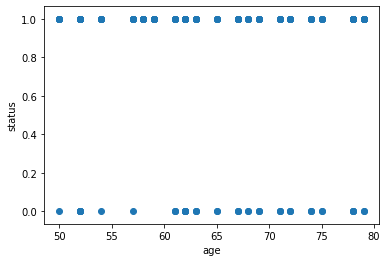

In [22]:
dt=dt
plt.scatter(dt['age'],dt['status'])
plt.xlabel("age")

plt.ylabel("status")
plt.show()

In [23]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
dt['status'] = le.fit_transform(dt['status'])
dt['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

In [24]:
y=dt['status']


X=dt.drop(['status','name'],axis=1)
print(X.shape)
print(y.shape)

(195, 19)
(195,)


In [25]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 4)

print("Shape of x_train :", x_train.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (175, 19)
Shape of y_train : (175,)
Shape of x_test : (20, 19)
Shape of y_test : (20,)


In [26]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [27]:
print(x_train.shape)
print(x_test.shape)
print(y_test.shape)
print(y_train.shape)

(175, 19)
(20, 19)
(20,)
(175,)


In [28]:
class Perceptron(object):

        def __init__(self, eta, n_iter):
                self.eta = eta
                self.n_iter = n_iter

        def fit(self, X, y):

                self.w_ = np.zeros(1 + X.shape[1])
                self.errors_=[]
                for _ in range(self.n_iter):
                        errors=0
                        for xi, target in zip(X, y):
                                error = target - self.predict(xi)
                                if error != 0:
                                        update = self.eta * error
                                        self.w_[1:] += update * xi
                                        self.w_[0] += update
                                        errors+=int(update!=0.0)
                        self.errors_.append(errors)
                return self

        def net_input(self, X):
                return np.dot(X, self.w_[1:]) + self.w_[0]

        def predict(self, X):
                return np.where(self.net_input(X) >= 0.0, 0, 1)

import matplotlib.pyplot as plt
#from sklearn.linear_model import Perceptron

model = Perceptron(n_iter=1000,eta=0.28)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print('misclassified samples: %d'%(y_test!=y_pred).sum())#compute
from sklearn.metrics import accuracy_score
print('Accuracy:%.2f'%accuracy_score(y_test,y_pred))
plt.show()

misclassified samples: 12
Accuracy:0.40
